# VISUALIZATIONS NOTEBOOK

This notebook contains the code for the main visualizations of our project in Machine Learning for 3D geometry.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap
import seaborn as sns
import pickle as pkl
from matplotlib.gridspec import GridSpec

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/TUM/ML3D/ML project/Files for visualizations"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DATA DISTRIBUTION

In [3]:
def read_pkl(filename):
    with open(filename, 'rb') as f:
        array = pkl.load(f)
    return array

In [4]:
num_planes = read_pkl(os.path.join(path, 'num_planes.pkl'))
num_classes = read_pkl(os.path.join(path, 'num_classes.pkl'))
planar = read_pkl(os.path.join(path, 'planar.pkl'))
class_distribution = read_pkl(os.path.join(path, 'class_distribution.pkl'))

In [5]:
num_planes_repo = read_pkl(os.path.join(path, 'num_planes_repo.pkl'))
num_classes_repo = read_pkl(os.path.join(path, 'num_classes_repo.pkl'))
planar_repo = read_pkl(os.path.join(path, 'planar_repo.pkl'))
class_distribution_repo = read_pkl(os.path.join(path, 'class_distribution_repo.pkl'))

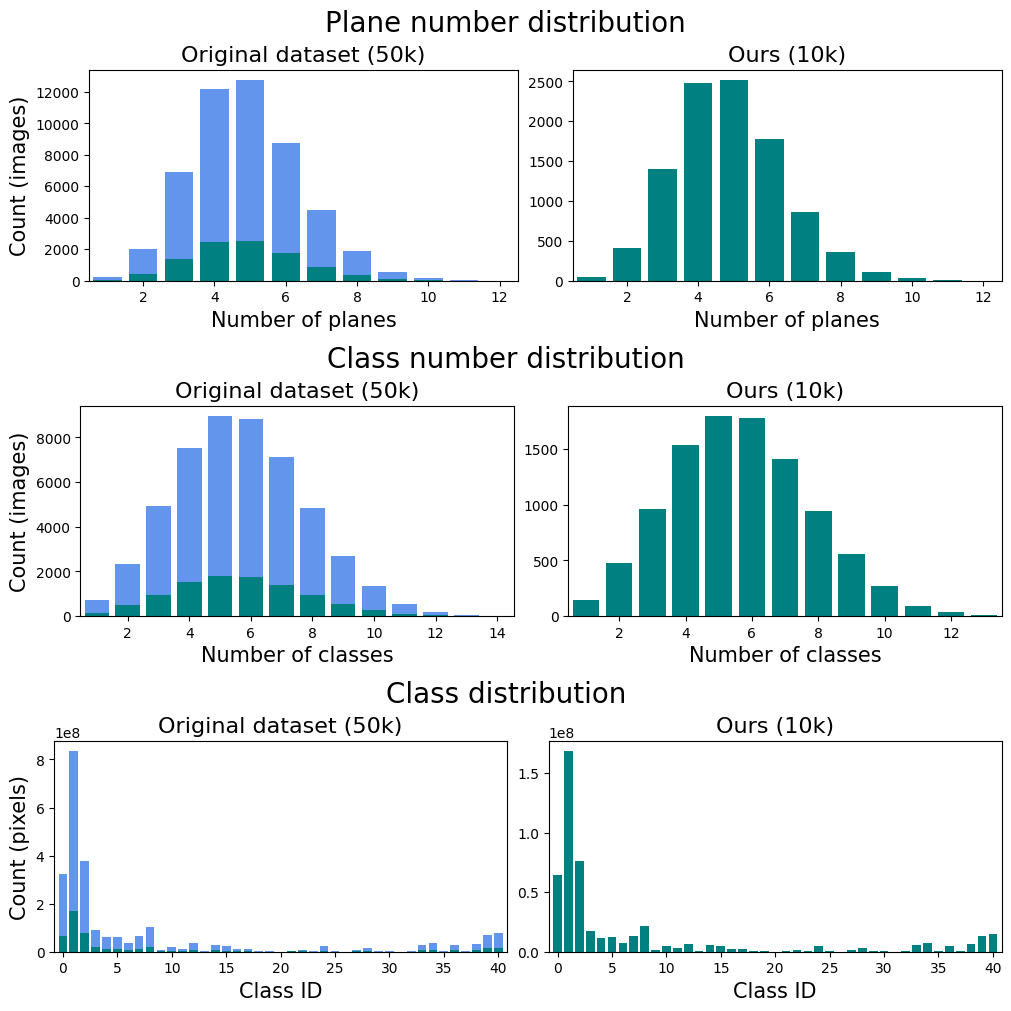

In [6]:
fig = plt.figure(constrained_layout=True, figsize=(10,10))

row_titles = ['Plane number distribution', 'Class number distribution', 'Class distribution']

figures = fig.subfigures(nrows=3, ncols=1)
for row, figure in enumerate(figures):
    figure.suptitle(row_titles[row], fontsize=20)
    axs = figure.subplots(1, 2)

    axs[0].set_title('Original dataset (50k)', fontsize=16)
    axs[1].set_title('Ours (10k)', fontsize=16)

    if row == 0:
        axs[0].bar(x=np.arange(1, len(np.unique(num_classes))), height=num_classes[1:len(np.unique(num_classes))], color='cornflowerblue')
        axs[0].bar(x=np.arange(1, len(np.unique(num_classes_repo))), height=num_classes_repo[1:len(np.unique(num_classes_repo))], color='teal')
        axs[1].bar(x=np.arange(1, len(np.unique(num_classes_repo))), height=num_classes_repo[1:len(np.unique(num_classes_repo))], color='teal')
        axs[0].set_xlabel('Number of planes', fontsize=15)
        axs[1].set_xlabel('Number of planes', fontsize=15)
        axs[0].set_ylabel('Count (images)', fontsize=15)
        axs[0].margins(x=0.01)
        axs[1].margins(x=0.01)

    if row == 1:
        axs[0].bar(x=np.arange(1, len(np.unique(num_planes))), height=num_planes[1:len(np.unique(num_planes))], color='cornflowerblue')
        axs[0].bar(x=np.arange(1, len(np.unique(num_planes_repo))), height=num_planes_repo[1:len(np.unique(num_planes_repo))], color='teal')
        axs[1].bar(x=np.arange(1, len(np.unique(num_planes_repo))), height=num_planes_repo[1:len(np.unique(num_planes_repo))], color='teal')
        axs[0].set_xlabel('Number of classes', fontsize=15)
        axs[1].set_xlabel('Number of classes', fontsize=15)
        axs[0].set_ylabel('Count (images)', fontsize=15)
        axs[0].margins(x=0.01)
        axs[1].margins(x=0.01)

    if row == 2:
        axs[0].bar(x=np.arange(len(class_distribution)), height=class_distribution,  color='cornflowerblue')
        axs[0].bar(x=np.arange(len(class_distribution_repo)), height=class_distribution_repo, color='teal')
        axs[1].bar(x=np.arange(len(class_distribution_repo)), height=class_distribution_repo, color='teal')
        axs[0].set_xlabel('Class ID', fontsize=15)
        axs[1].set_xlabel('Class ID', fontsize=15)
        axs[0].set_ylabel('Count (pixels)', fontsize=15)
        axs[0].margins(x=0.01)
        axs[1].margins(x=0.01)

# plt.savefig('data_distribution.pdf')

### Planar/Non-planar distribution

In [7]:
print(planar, planar_repo)

0.7911381961976682 0.7927209008428593


# CONTRASTIVE LOSS

## LOSS COMPARISONS

Baseline and 3 versions of the supervised contrastive loss. From their history losses we observe the training curves, in order to assess their performance.

In [8]:
# Baseline: discriminative loss, LE = L_pull + L_push
c0 = np.load(os.path.join(path, "history_baseline.pkl"), allow_pickle=True)
c0 = [pull + push for pull, push in zip(c0['losses_pull'], c0['losses_push'])]

# Contrastive: LE is stored in both L_pull = L_push
c1 = np.load(os.path.join(path, "resnet101_contrastive_centers_epoch5.pkl"), allow_pickle=True)['losses_pull'] # contrastive
c2 = np.load(os.path.join(path, "resnet101_contrastive_anchors_m20_epoch5.pkl"), allow_pickle=True)['losses_pull'] # anchors
c3 = np.load(os.path.join(path, "resnet101_contrastive_anchors_neg_m20_epoch5.pkl"), allow_pickle=True)['losses_pull'] # anchors neg

In [9]:
print(len(c0), len(c1), len(c2), len(c3))

5 130 3125 130


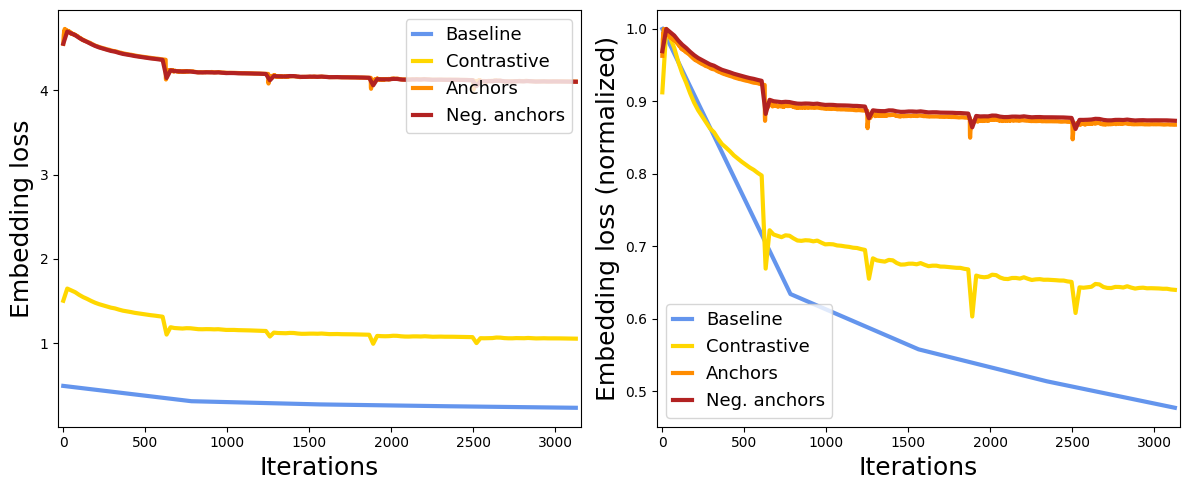

In [10]:
x_values_0 = np.linspace(1, 3126, len(c0))
x_values_1_3 = np.linspace(1, 3126, len(c1))
x_values_2 = np.linspace(1, 3126, len(c2))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Curves
line1 = axs[0].plot(x_values_0, c0, label='Baseline', color='cornflowerblue', linewidth=3)
line2 = axs[0].plot(x_values_1_3, c1, label='Contrastive', color='gold', linewidth=3)
line3 = axs[0].plot(x_values_2, c2, label='Anchors', color='darkorange', linewidth=3)
line4 = axs[0].plot(x_values_1_3, c3, label='Neg. anchors', color='firebrick', linewidth=3)

axs[0].set_xlabel('Iterations', fontsize=18)
axs[0].set_ylabel('Embedding loss', fontsize=18)
axs[0].legend(handlelength=1, loc='upper right', fontsize=13)
axs[0].margins(x=0.01)


# Normalized curves
line1 = axs[1].plot(x_values_0, c0/np.max(c0), label='Baseline', color='cornflowerblue',  linewidth=3)
line2 = axs[1].plot(x_values_1_3, c1/np.max(c1), label='Contrastive', color='gold',  linewidth=3)
line3 = axs[1].plot(x_values_2, c2/np.max(c2), label='Anchors', color='darkorange', linewidth=3)
line4 = axs[1].plot(x_values_1_3, c3/np.max(c3), label='Neg. anchors', color='firebrick', linewidth=3)

axs[1].set_xlabel('Iterations', fontsize=18)
axs[1].set_ylabel('Embedding loss (normalized)', fontsize=18)
axs[1].legend(handlelength=1, loc='lower left', fontsize=13)
axs[1].margins(x=0.01)



plt.tight_layout()
plt.savefig('contrastive_curves.pdf')
plt.show()

## EMBEDDING COMPARISONS

For each of the 4 losses we get the embedding.pt and instance.pt file of the same 4 validation images.

In [11]:
embedding_c0 = torch.load('/content/drive/MyDrive/TUM/ML3D/ML project/embedding.pt')[0:4] # B x 2 x 192 x 256
instance_c0 = torch.load('/content/drive/MyDrive/TUM/ML3D/ML project/instance.pt')[0:4] # B x 21 x 192 x 256

embedding_c1 = torch.load('/content/drive/MyDrive/TUM/ML3D/ML project/embedding.pt')[4:8] # B x 2 x 192 x 256
instance_c1 = torch.load('/content/drive/MyDrive/TUM/ML3D/ML project/instance.pt')[4:8] # B x 21 x 192 x 256

embedding_c2 = torch.load('/content/drive/MyDrive/TUM/ML3D/ML project/embedding.pt')[8:12] # B x 2 x 192 x 256
instance_c2 = torch.load('/content/drive/MyDrive/TUM/ML3D/ML project/instance.pt')[8:12] # B x 21 x 192 x 256

embedding_c3 = torch.load('/content/drive/MyDrive/TUM/ML3D/ML project/embedding.pt')[12:16] # B x 2 x 192 x 256
instance_c3 = torch.load('/content/drive/MyDrive/TUM/ML3D/ML project/instance.pt')[12:16] # B x 21 x 192 x 256

In [12]:
embedding = torch.cat((embedding_c0, embedding_c1, embedding_c2, embedding_c3))
instance = torch.cat((instance_c0, instance_c1, instance_c2, instance_c3))

print(embedding.shape, instance.shape)

torch.Size([16, 2, 192, 256]) torch.Size([16, 21, 192, 256])


In [13]:
labels = torch.zeros(instance.shape[0], instance.shape[2], instance.shape[3])
for i in range(instance.shape[1]):
    labels += instance[:, i, :, :]*i

In [14]:
spectral_colors_seaborn = sns.color_palette("Spectral", n_colors=12)
spectral_colors = spectral_colors_seaborn.as_hex()
spectral_colormap = ListedColormap(spectral_colors, name='spectral')

In [15]:
def plot_embedding(emb_path=None, inst_path=None, embedding=None, instance=None):


    fig = plt.figure(constrained_layout=True, figsize=(10,5))

    col_titles = ['Baseline Loss', 'Contrastive Loss', 'Contrastive anchor loss', 'Contrastive negative anchor loss']
    row_titles = ['Sample 1', 'Sample 2', 'Sample 3', 'Sample 4']

    if emb_path is not None:
        embedding = torch.load(emb_path)
    if inst_path is not None:
        instance = torch.load(inst_path)

    labels = torch.zeros(instance.shape[0], instance.shape[2], instance.shape[3])
    for i in range(instance.shape[1]):
        labels += instance[:, i, :, :]*i

    labels.view(labels.shape[0], -1)
    embedding.view(embedding.shape[0], embedding.shape[1], -1)

    batch_img = embedding.detach().numpy()
    batch_img = batch_img[:, :, ::3, ::3][0:8]
    batch_labels = labels.numpy()
    batch_labels = batch_labels[:,::3,::3][0:8]

    figures = fig.subfigures(nrows=1, ncols=4)

    for col, figure in enumerate(figures):
        figure.suptitle(col_titles[col], fontsize=12)
        axes = figure.subplots(2, 1)

        for row in range(2):
            axes[row].scatter(batch_img[2*col + row][0], batch_img[2*col + row][1], c=batch_labels[2*col + row], s=3, cmap=spectral_colormap)
            axes[row].axis('off')
            axes[row].set_title(row_titles[row], fontsize=9)

    # plt.savefig('embedding_comparison.pdf')
    plt.show

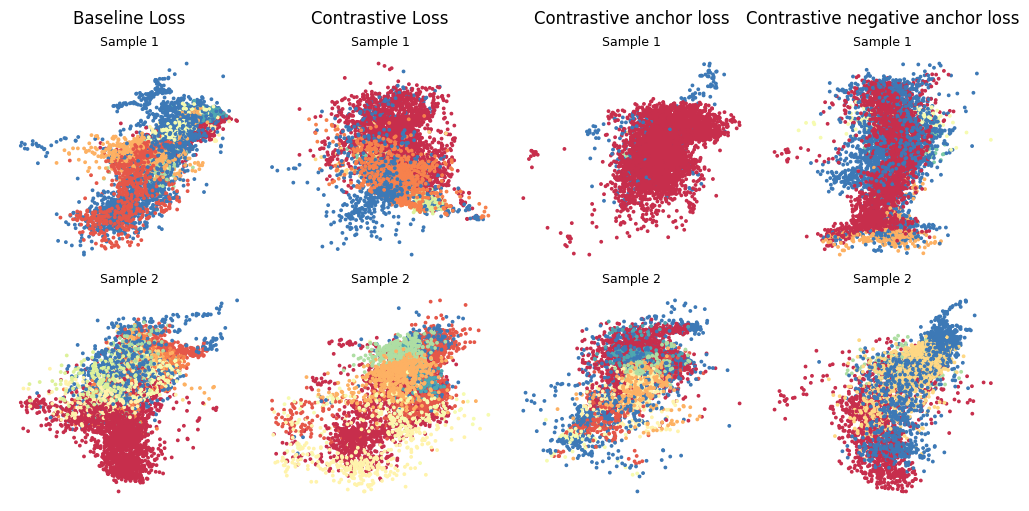

In [16]:
plot_embedding(embedding=embedding, instance=instance)

## VALUES OF m

The parameter $m$ is the number of subsampled centers we create as anchors. We fine-tune it and plot its influence in the training process.

In [17]:
m0 = np.load(os.path.join(path, "resnet101_contrastive_centers_epoch5.pkl"), allow_pickle=True)['losses_pull'] # m=0 only centers
m1 = np.load(os.path.join(path, "resnet101_contrastive_anchors_m20_epoch5.pkl"), allow_pickle=True)['losses_pull'] # m=20 default
m2 = np.load(os.path.join(path, "resnet101_contrastive_anchors_m50_epoch5.pkl"), allow_pickle=True)['losses_pull'] # m=50
m3 = np.load(os.path.join(path, "resnet101_contrastive_anchors_m100_epoch5.pkl"), allow_pickle=True)['losses_pull'] # m=100

In [18]:
print(len(m0), len(m1), len(m2), len(m3))

130 3125 3125 3125


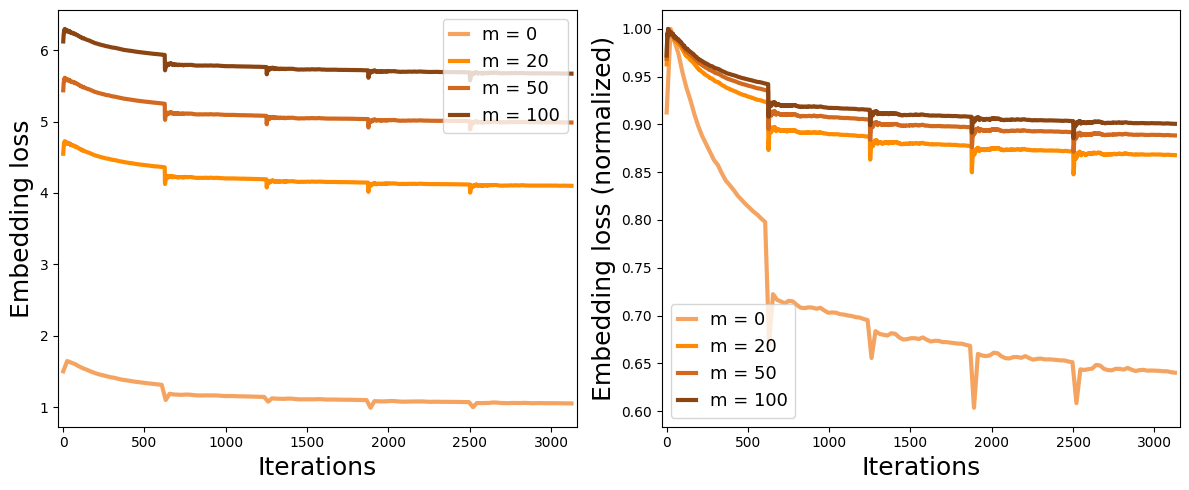

In [19]:
x_values_0 = np.linspace(1, 3126, len(m0))
x_values = np.linspace(1, 3126, len(m1))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))


# Plot the lines
line1 = axs[0].plot(x_values_0, m0, label='m = 0', color='sandybrown', linewidth=3)
line2 = axs[0].plot(x_values, m1, label='m = 20', color='darkorange', linewidth=3)
line3 = axs[0].plot(x_values, m2, label='m = 50', color='chocolate', linewidth=3)
line4 = axs[0].plot(x_values, m3, label='m = 100', color='saddlebrown', linewidth=3)




axs[0].set_xlabel('Iterations', fontsize=18)
axs[0].set_ylabel('Embedding loss', fontsize=18)
axs[0].legend(handlelength=1, loc='upper right', fontsize=13)
axs[0].margins(x=0.01)


line1 = axs[1].plot(x_values_0, m0/np.max(m0), label='m = 0', color='sandybrown', linewidth=3)
line2 = axs[1].plot(x_values, m1/np.max(m1), label='m = 20', color='darkorange', linewidth=3)
line3 = axs[1].plot(x_values, m2/np.max(m2), label='m = 50', color='chocolate', linewidth=3)
line4 = axs[1].plot(x_values, m3/np.max(m3), label='m = 100', color='saddlebrown', linewidth=3)

axs[1].set_xlabel('Iterations', fontsize=18)
axs[1].set_ylabel('Embedding loss (normalized)', fontsize=18)
axs[1].legend(handlelength=1, loc='lower left', fontsize=13)
axs[1].margins(x=0.01)



plt.tight_layout()
plt.savefig('m_training_curves.pdf')

plt.show()

## FINAL EVALUATION

### PER-PIXEL and PER-PLANE RECALL

In [20]:
pixel_baseline = [0., 0.10088247, 0.24343157, 0.34720626, 0.43198079, 0.49460507,
 0.5320374,  0.56826576, 0.58781993, 0.60261733, 0.61647179, 0.62501744,
 0.62934931]
plane_baseline = [0., 0.07828559, 0.18368686, 0.26547124, 0.3284496,  0.37196589,
 0.40258036, 0.42947737, 0.44500328, 0.45877979, 0.46840149, 0.47692981,
 0.4804286 ]

contrastive_pixel = [0., 0.03560632, 0.09829715, 0.14656778, 0.17928404, 0.20553973,
 0.22244381, 0.23866865, 0.25129303, 0.25712954, 0.26937881, 0.275066, 0.27824182]
contrastive_plane = [0., 0.02274218, 0.05947955, 0.08834463, 0.10846272, 0.12289525,
 0.13339165, 0.14257599, 0.14913623, 0.15350973, 0.16028865, 0.1633501, 0.16488082]

anchors_pixel = [0., 0.04228757, 0.09508605, 0.14488468, 0.1730862,  0.19513789,
 0.21685488, 0.2287887,  0.23794144, 0.2463554,  0.2535876,  0.25965537, 0.26375664]
anchors_plane = [0., 0.02580363, 0.05794883, 0.08681391, 0.10408922, 0.11939646,
 0.13186092, 0.13929587, 0.14498141, 0.15044828, 0.15394708, 0.15700853, 0.1589766]


anchors_neg_pixel = [0., 0.03871426, 0.09800477, 0.13837242, 0.16670952, 0.18890011,
 0.20670887, 0.22311466, 0.23405961, 0.24028966, 0.24802415, 0.25189113, 0.25265878]
anchors_neg_plane = [0., 0.0286464,  0.06385305, 0.08746993, 0.10518259, 0.11720971,
0.12879948, 0.13820249, 0.14476274, 0.14891756, 0.15307238, 0.15504045, 0.15591515]

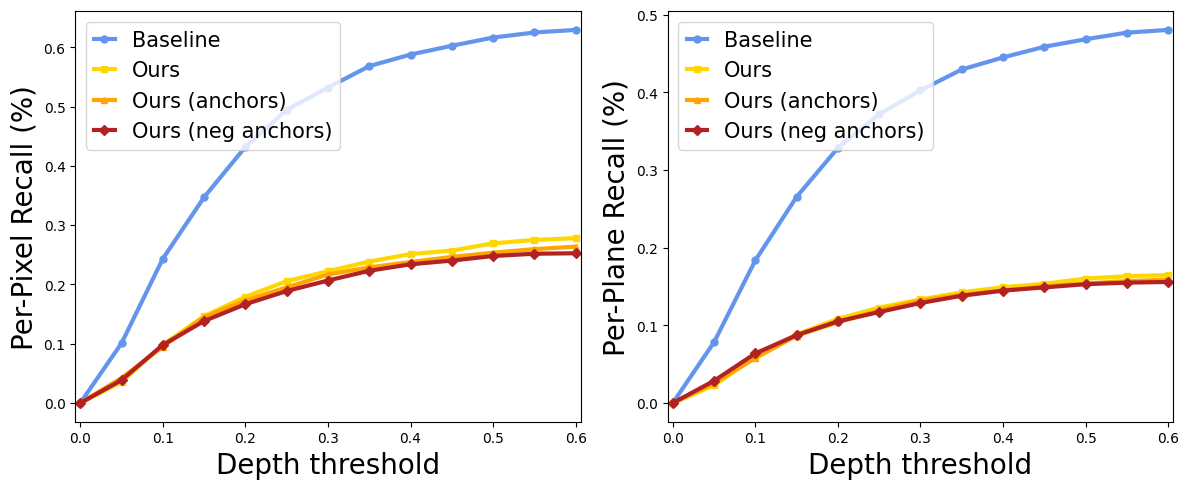

In [21]:
x_values = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]


fig, axs = plt.subplots(1, 2, figsize=(12, 5))


line1, = axs[0].plot(x_values, pixel_baseline, label='Baseline', color='cornflowerblue', marker='o', markersize=5, linewidth=3)
line2, = axs[0].plot(x_values, contrastive_pixel, label='Ours', color='gold', marker='s', markersize=5, linewidth=3)
line3, = axs[0].plot(x_values, anchors_pixel, label='Ours (anchors)', color='orange', marker='^', markersize=5, linewidth=3)
line4, = axs[0].plot(x_values, anchors_neg_pixel, label='Ours (neg anchors)', color='firebrick', marker='D', markersize=5, linewidth=3)


axs[0].set_xlabel('Depth threshold', fontsize=20)
axs[0].set_ylabel('Per-Pixel Recall (%)', fontsize=20)
axs[0].legend(handlelength=1, loc='upper left', fontsize=15)
axs[0].margins(x=0.01)

line5, = axs[1].plot(x_values, plane_baseline, label='Baseline', color='cornflowerblue', marker='o', markersize=5, linewidth=3)
line6, = axs[1].plot(x_values, contrastive_plane, label='Ours', color='gold', marker='s', markersize=5, linewidth=3)
line7, = axs[1].plot(x_values, anchors_plane, label='Ours (anchors)', color='orange', marker='^', markersize=5, linewidth=3)
line8, = axs[1].plot(x_values, anchors_neg_plane, label='Ours (neg anchors)', color='firebrick', marker='D', markersize=5, linewidth=3)



axs[1].set_xlabel('Depth threshold', fontsize=20)
axs[1].set_ylabel('Per-Plane Recall (%)', fontsize=20)
axs[1].legend(handlelength=1, loc='upper left', fontsize=15)
axs[1].margins(x=0.01)


# Show the plot
plt.tight_layout()
# plt.savefig('contrastive_recall.pdf')

plt.show()

# SEMANTIC


Training curves and pixel and plane recall curves for the two methods developed in the project.

In [22]:
s1 = np.load(os.path.join(path, "semantic.pkl"), allow_pickle=True)['losses_semantic']
s2 = np.load(os.path.join(path, "semantic_extra.pkl"), allow_pickle=True)['losses_semantic']

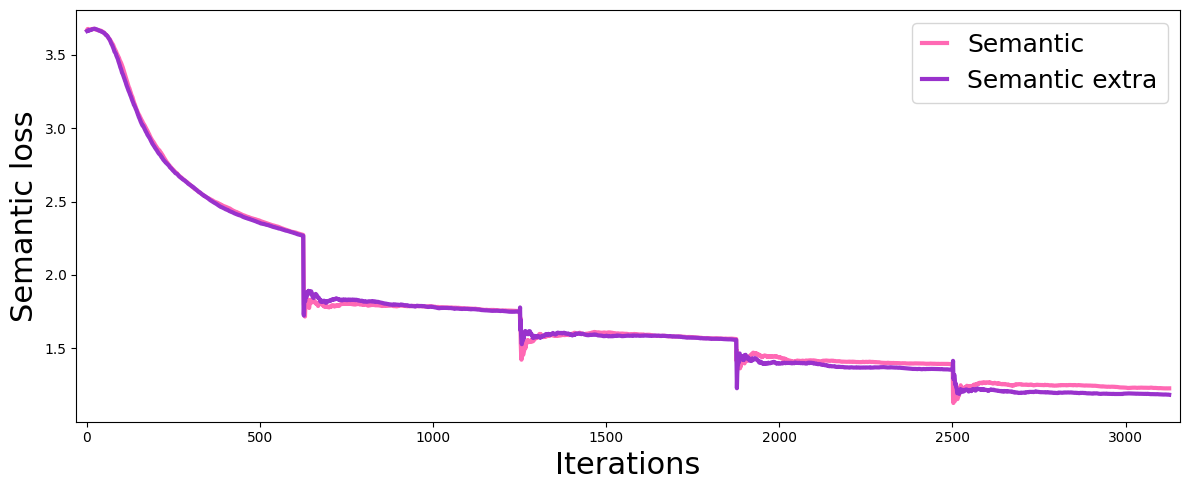

In [23]:
x_values = np.linspace(1, 3126, len(s1))

fig, axs = plt.subplots(1, 1, figsize=(12, 5))

line1 = axs.plot(x_values, s1, label='Semantic', color='hotpink', linewidth=3)
line2 = axs.plot(x_values, s2, label='Semantic extra', color='darkorchid', linewidth=3)

axs.set_xlabel('Iterations', fontsize=22)
axs.set_ylabel('Semantic loss', fontsize=22)
axs.legend(handlelength=1, loc='upper right', fontsize=18)
axs.margins(x=0.01)


plt.tight_layout()
# plt.savefig('semantic_curve.pdf')
plt.show()

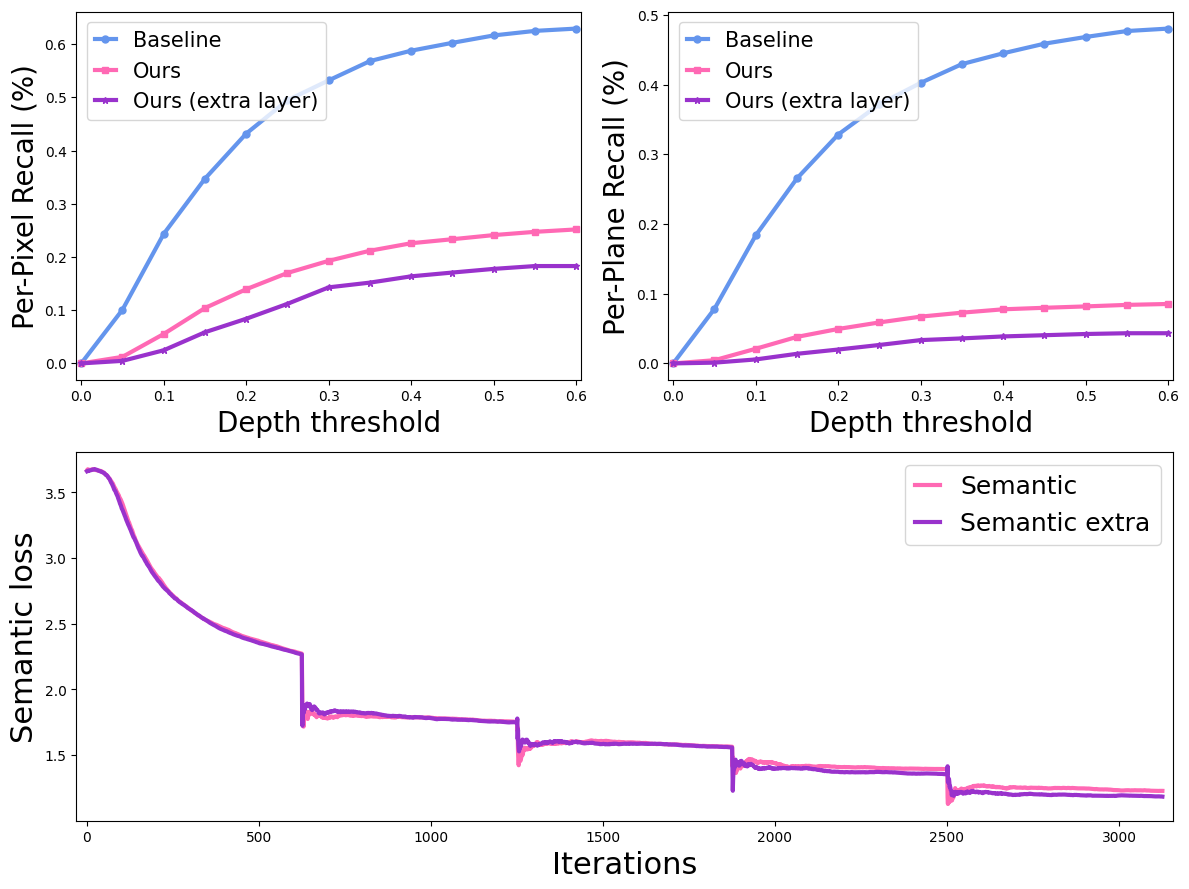

In [24]:
plt.figure(figsize=(12,9))

grid = GridSpec(2, 2, height_ratios=[1, 1])
ax0 = plt.subplot(grid[0,0])
ax1 = plt.subplot(grid[0,1])
ax2 = plt.subplot(grid[1,:])


# FIGURE 1
pixel_baseline = [0., 0.10088247, 0.24343157, 0.34720626, 0.43198079, 0.49460507,
 0.5320374,  0.56826576, 0.58781993, 0.60261733, 0.61647179, 0.62501744,
 0.62934931]
plane_baseline = [0.,         0.07828559, 0.18368686, 0.26547124, 0.3284496,  0.37196589,
 0.40258036, 0.42947737, 0.44500328, 0.45877979, 0.46840149, 0.47692981,
 0.4804286 ]

pixel_extras = [0., 0.00478449, 0.02468754, 0.05858352, 0.08394108, 0.1119855,
 0.14297042, 0.15186629, 0.16367666, 0.17079762, 0.17766801, 0.18299555, 0.18299555]
plane_extras = [0., 0.00109337, 0.00568555, 0.01377651, 0.01989941, 0.02645965,
 0.03345725, 0.03586267, 0.03870545, 0.04045484, 0.04220424, 0.04329762, 0.04329762]

pixel_no_extras = [0.,  0.01228689, 0.05531667, 0.10409743, 0.13941953, 0.17000838,
 0.19281804, 0.21182488, 0.22589422, 0.23343345, 0.24119156, 0.24730025, 0.25184117]
plane_no_extras = [0., 0.00459217, 0.02099278, 0.03804942, 0.04942051, 0.05882353,
 0.06713317, 0.07281872, 0.07762956, 0.07981631, 0.08178439, 0.08397113, 0.08528318]

x_values = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]

line1, = ax0.plot(x_values, pixel_baseline, label='Baseline', color='cornflowerblue', marker='o', markersize=5, linewidth=3)
line2, = ax0.plot(x_values, pixel_no_extras, label='Ours', color='hotpink', marker='s', markersize=5, linewidth=3)
line3, = ax0.plot(x_values, pixel_extras, label='Ours (extra layer)', color='darkorchid', marker='*', markersize=5, linewidth=3)
ax0.set_xlabel('Depth threshold', fontsize=20)
ax0.set_ylabel('Per-Pixel Recall (%)', fontsize=20)
ax0.legend(handlelength=1, loc='upper left', fontsize=15)
ax0.margins(x=0.01)

line4, = ax1.plot(x_values, plane_baseline, label='Baseline', color='cornflowerblue', marker='o', markersize=5, linewidth=3)
line5, = ax1.plot(x_values, plane_no_extras, label='Ours', color='hotpink', marker='s', markersize=5, linewidth=3)
line6, = ax1.plot(x_values, plane_extras, label='Ours (extra layer)', color='darkorchid', marker='*', markersize=5, linewidth=3)
ax1.set_xlabel('Depth threshold', fontsize=20)
ax1.set_ylabel('Per-Plane Recall (%)', fontsize=20)
ax1.legend(handlelength=1, loc='upper left', fontsize=15)
ax1.margins(x=0.01)



# FIGURE 2
x_values = np.linspace(1, 3126, len(s1))

line1 = ax2.plot(x_values, s1, label='Semantic', color='hotpink', linewidth=3)
line2 = ax2.plot(x_values, s2, label='Semantic extra', color='darkorchid', linewidth=3)

ax2.set_xlabel('Iterations', fontsize=22)
ax2.set_ylabel('Semantic loss', fontsize=22)
ax2.legend(handlelength=1, loc='upper right', fontsize=18)
ax2.margins(x=0.01)


plt.tight_layout()
plt.savefig('semantic_results.pdf')

plt.show()

## FINAL


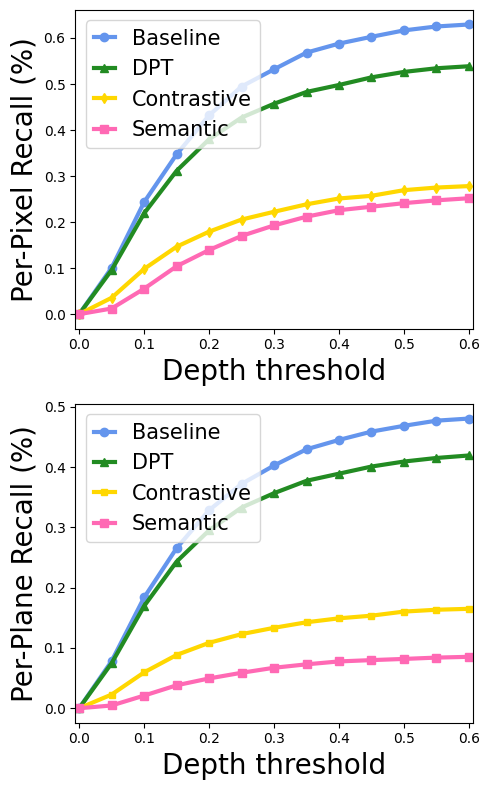

In [25]:
pixel_baseline = [0., 0.10088247, 0.24343157, 0.34720626, 0.43198079, 0.49460507,
 0.5320374,  0.56826576, 0.58781993, 0.60261733, 0.61647179, 0.62501744,
 0.62934931]
plane_baseline = [0.,         0.07828559, 0.18368686, 0.26547124, 0.3284496,  0.37196589,
 0.40258036, 0.42947737, 0.44500328, 0.45877979, 0.46840149, 0.47692981,
 0.4804286 ]

pixel_extras = [0., 0.00478449, 0.02468754, 0.05858352, 0.08394108, 0.1119855,
 0.14297042, 0.15186629, 0.16367666, 0.17079762, 0.17766801, 0.18299555, 0.18299555]
plane_extras = [0., 0.00109337, 0.00568555, 0.01377651, 0.01989941, 0.02645965,
 0.03345725, 0.03586267, 0.03870545, 0.04045484, 0.04220424, 0.04329762, 0.04329762]

pixel_no_extras = [0.,  0.01228689, 0.05531667, 0.10409743, 0.13941953, 0.17000838,
 0.19281804, 0.21182488, 0.22589422, 0.23343345, 0.24119156, 0.24730025, 0.25184117]
plane_no_extras = [0., 0.00459217, 0.02099278, 0.03804942, 0.04942051, 0.05882353,
 0.06713317, 0.07281872, 0.07762956, 0.07981631, 0.08178439, 0.08397113, 0.08528318]

pixel_dpt = [0., 0.09594726, 0.2190536, 0.31144453, 0.3799136, 0.42714037,
 0.4571416, 0.48280534, 0.49791348, 0.5144583 ,0.52628998, 0.5342085,
 0.53862206]
plane_dpt = [0., 0.07478679, 0.16947299, 0.24316641, 0.29499235, 0.33282309,
 0.35665865, 0.37721408, 0.38902252, 0.40083096, 0.40914061, 0.41504483,
 0.41919965]

contrastive_pixel = [0., 0.03560632, 0.09829715, 0.14656778, 0.17928404, 0.20553973,
 0.22244381, 0.23866865, 0.25129303, 0.25712954, 0.26937881, 0.275066, 0.27824182]
contrastive_plane = [0., 0.02274218, 0.05947955, 0.08834463, 0.10846272, 0.12289525,
 0.13339165, 0.14257599, 0.14913623, 0.15350973, 0.16028865, 0.1633501, 0.16488082]

x_values = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]


fig, axs = plt.subplots(2, 1, figsize=(5, 8))


line1, = axs[0].plot(x_values, pixel_baseline, label='Baseline', color='cornflowerblue', marker='o', markersize=6, linewidth=3)
line2, = axs[0].plot(x_values, pixel_dpt, label='DPT', color='forestgreen', marker='^', markersize=6, linewidth=3)
line3, = axs[0].plot(x_values, contrastive_pixel, label='Contrastive', color='gold', marker='d', markersize=5, linewidth=3)
line4, = axs[0].plot(x_values, pixel_no_extras, label='Semantic', color='hotpink', marker='s', markersize=6, linewidth=3)



axs[0].set_xlabel('Depth threshold', fontsize=20)
axs[0].set_ylabel('Per-Pixel Recall (%)', fontsize=20)
axs[0].legend(handlelength=1, loc='upper left', fontsize=15)
axs[0].margins(x=0.01)

line5, = axs[1].plot(x_values, plane_baseline, label='Baseline', color='cornflowerblue', marker='o', markersize=6, linewidth=3)
line6, = axs[1].plot(x_values, plane_dpt, label='DPT', color='forestgreen', marker='^', markersize=6, linewidth=3)
line7, = axs[1].plot(x_values, contrastive_plane, label='Contrastive', color='gold', marker='s', markersize=5, linewidth=3)
line8, = axs[1].plot(x_values, plane_no_extras, label='Semantic', color='hotpink', marker='s', markersize=6, linewidth=3)

axs[1].set_xlabel('Depth threshold', fontsize=20)
axs[1].set_ylabel('Per-Plane Recall (%)', fontsize=20)
axs[1].legend(handlelength=1, loc='upper left', fontsize=15)
axs[1].margins(x=0.01)


# Show the plot
plt.tight_layout()
plt.savefig('total_recall.pdf')

plt.show()

# OTHER FUNCTIONS

In [26]:
def plot_embedding(emb_path=None, inst_path=None, embedding=None, instance=None):


    fig = plt.figure(constrained_layout=True, figsize=(10,10))

    row_titles = ['Baseline Loss', 'Contrastive Loss', 'Contrastive anchor loss', 'Contrastive negative anchor loss']
    col_titles = ['Sample 1', 'Sample 2', 'Sample 3', 'Sample 4']

    if emb_path is not None:
        embedding = torch.load(emb_path)
    if inst_path is not None:
        instance = torch.load(inst_path)

    labels = torch.zeros(instance.shape[0], instance.shape[2], instance.shape[3])
    for i in range(instance.shape[1]):
        labels += instance[:, i, :, :]*i

    labels.view(labels.shape[0], -1)
    embedding.view(embedding.shape[0], embedding.shape[1], -1)

    batch_img = embedding.detach().numpy()
    batch_img = batch_img[:, :, ::3, ::3]
    batch_labels = labels.numpy()
    batch_labels = batch_labels[:,::3,::3]

    figures = fig.subfigures(nrows=4, ncols=1)
    for row, figure in enumerate(figures):
        figure.suptitle(row_titles[row])

        axes = figure.subplots(1, 4) # assuming batch_size=16
        # axes = axes.flatten()

        for col in range(4):
            axes[col].scatter(batch_img[4*row + col][0], batch_img[4*row + col][1], c=batch_labels[4*row + col], s=3, cmap=spectral_colormap)
            axes[col].axis('off')
            axes[col].title.set_text(col_titles[col])

    plt.savefig('embedding_comparison.png')
    plt.show